In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Functions

def SSIM(original, processed):
    """Calculate Mean Squared Error (MSE) and Pearson Correlation Coefficient (PCC) between two images."""
    # Apply Fourier Transform to both images
    original_ft = np.fft.fftshift(np.fft.fft2(original))
    filtered_ft = np.fft.fftshift(np.fft.fft2(processed))

    # Compute the magnitude spectra of the Fourier Transforms
    magnitude_spectrum_original = np.log(np.abs(original_ft) + 1)
    magnitude_spectrum_filtered = np.log(np.abs(filtered_ft) + 1)

    # Compute MSE
    mse_value = np.mean((magnitude_spectrum_original - magnitude_spectrum_filtered) ** 2)

    # Compute Pearson correlation
    mean1 = np.mean(magnitude_spectrum_original)
    mean2 = np.mean(magnitude_spectrum_filtered)
    numerator = np.sum((magnitude_spectrum_original - mean1) * (magnitude_spectrum_filtered - mean2))
    denominator = np.sqrt(np.sum((magnitude_spectrum_original - mean1) ** 2) *
                           np.sum((magnitude_spectrum_filtered - mean2) ** 2))
    correlation_value = numerator / denominator if denominator != 0 else 0  # Prevent division by zero

    return mse_value, correlation_value, magnitude_spectrum_original, magnitude_spectrum_filtered

def load_images(image_paths):
    """Load images from the specified paths and return them as a list."""
    return [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in image_paths]

def plot_spectra(original, filtered, title_suffix):
    """Plot the original and filtered magnitude spectra."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    ax1.imshow(original, cmap='gray')
    ax1.set_title(f'Original Magnitude Spectrum {title_suffix}')
    ax1.axis('off')

    ax2.imshow(filtered, cmap='gray')
    ax2.set_title(f'Filtered Magnitude Spectrum {title_suffix}')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

Mean Squared Error (MSE): 0.0000
Pearson Correlation Coefficient: 1.0000



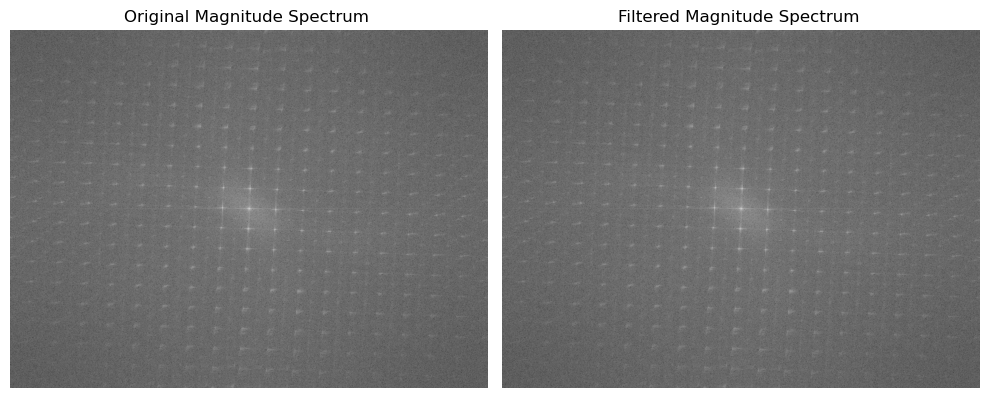

In [3]:
original_fabric = cv2.imread('Img\\Fabric.jpg', cv2.IMREAD_GRAYSCALE)
mse_value, correlation_value, magnitude_spectrum_original, magnitude_spectrum_filtered = SSIM(original_fabric, original_fabric)
print(f"Mean Squared Error (MSE): {mse_value:.4f}")
print(f"Pearson Correlation Coefficient: {correlation_value:.4f}\n")
plot_spectra(magnitude_spectrum_original, magnitude_spectrum_filtered, '')

# Fabric

Mean Squared Error (MSE): 1.4970
Pearson Correlation Coefficient: 0.3667



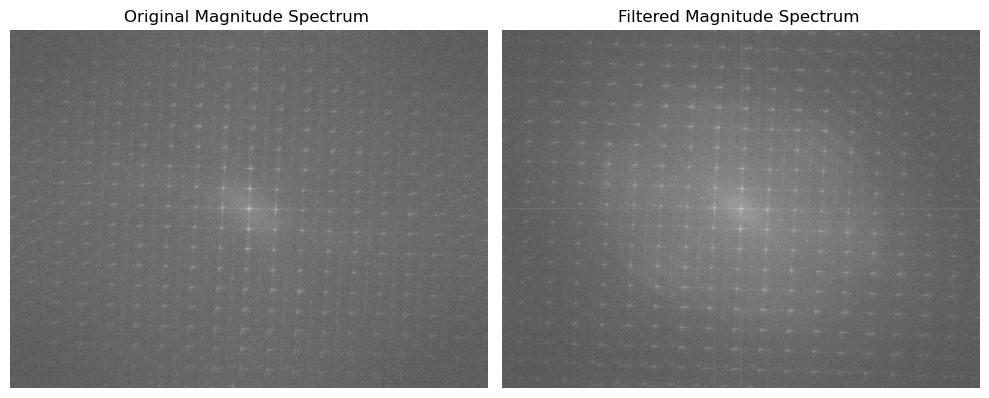

Mean Squared Error (MSE): 2.7869
Pearson Correlation Coefficient: 0.3275



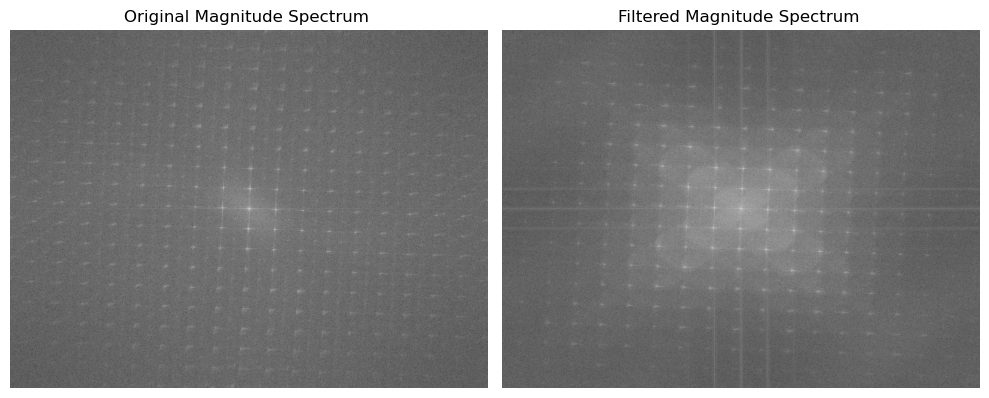

In [4]:
# Load the original fabric image
original_fabric = cv2.imread('Img\\Fabric.jpg', cv2.IMREAD_GRAYSCALE)
filtered_fabric = load_images(['Img\\Fabric_15.jpg', 
                               'Img\\Fabric_10.jpg'])

# Analyze images and plot results
for filtered in filtered_fabric:  # Iterate directly over filtered_fabric
    mse_value, correlation_value, magnitude_spectrum_original, magnitude_spectrum_filtered = SSIM(original_fabric, filtered)
    print(f"Mean Squared Error (MSE): {mse_value:.4f}")
    print(f"Pearson Correlation Coefficient: {correlation_value:.4f}\n")
    plot_spectra(magnitude_spectrum_original, magnitude_spectrum_filtered, '')

Mean Squared Error (MSE): 2.1132
Pearson Correlation Coefficient: 0.5628



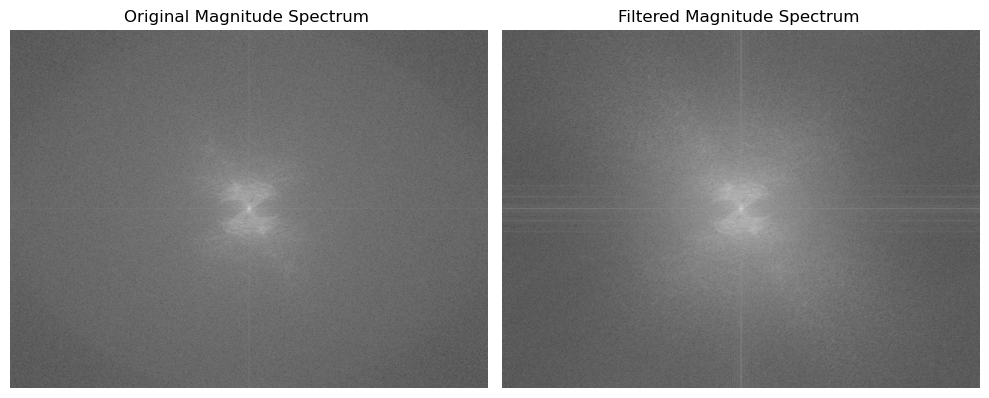

Mean Squared Error (MSE): 2.8088
Pearson Correlation Coefficient: 0.5430



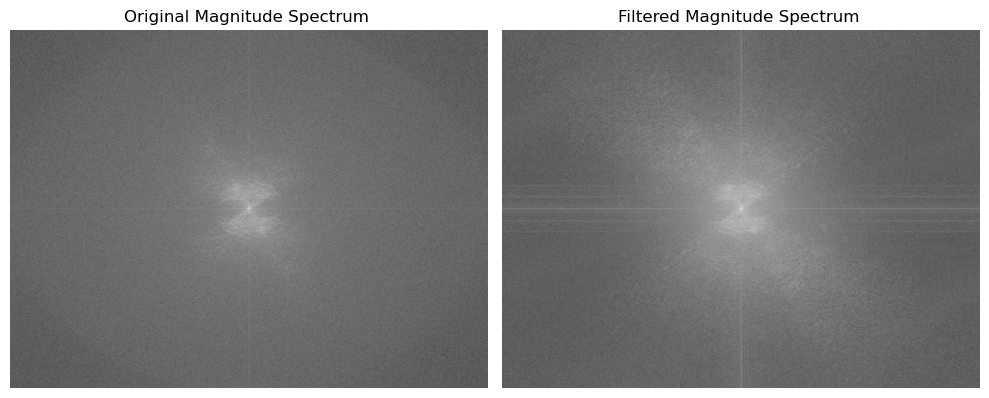

Mean Squared Error (MSE): 0.9101
Pearson Correlation Coefficient: 0.4051



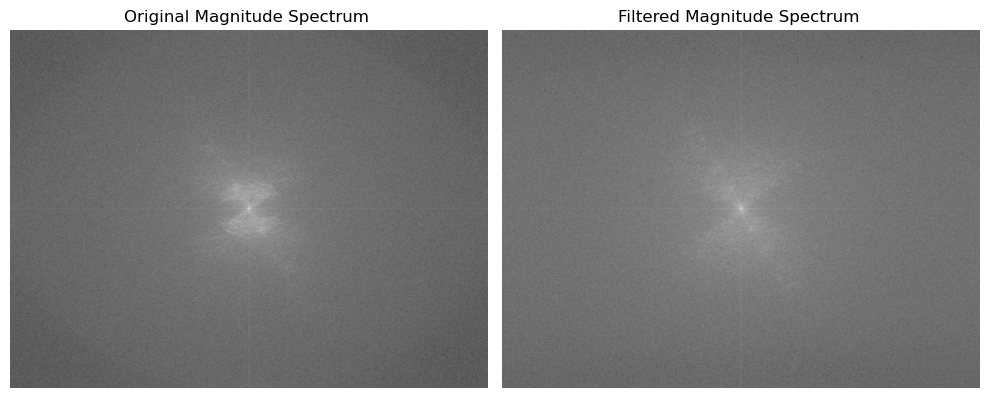

Mean Squared Error (MSE): 0.8924
Pearson Correlation Coefficient: 0.4137



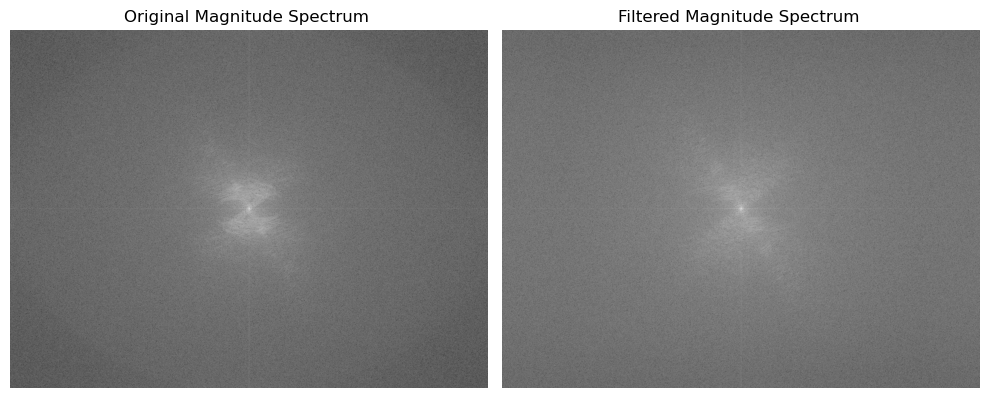

Mean Squared Error (MSE): 0.8277
Pearson Correlation Coefficient: 0.4651



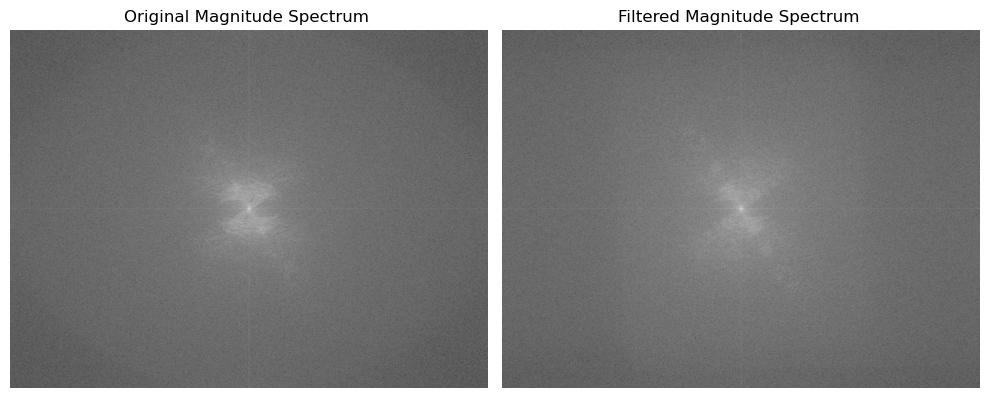

In [5]:
# Load the original Maxi Hair image
original_Maxi_Hair = cv2.imread('Img\\Maxi_Full.jpg', cv2.IMREAD_GRAYSCALE)
filtered_Maxi_Hair = load_images(['Img\\Maxi_15.jpg', 
                                  'Img\\Maxi_10.jpg', 
                                  'Img\\Maxi_grande.jpg', 
                                  'Img\\Maxi_mediano.jpg', 
                                  'Img\\Maxi_pequeno.jpg'])

# Analyze images and plot results
for filtered in filtered_Maxi_Hair:  # Iterate directly over filtered_Maxi_Hair
    mse_value, correlation_value, magnitude_spectrum_original, magnitude_spectrum_filtered = SSIM(original_Maxi_Hair, filtered)
    print(f"Mean Squared Error (MSE): {mse_value:.4f}")
    print(f"Pearson Correlation Coefficient: {correlation_value:.4f}\n")
    plot_spectra(magnitude_spectrum_original, magnitude_spectrum_filtered, '')

Mean Squared Error (MSE): 5.0267
Pearson Correlation Coefficient: 0.5290



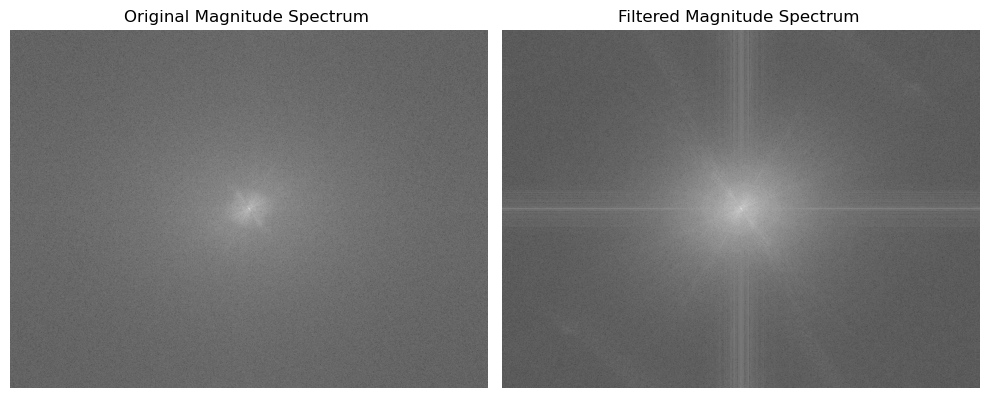

Mean Squared Error (MSE): 6.3692
Pearson Correlation Coefficient: 0.4486



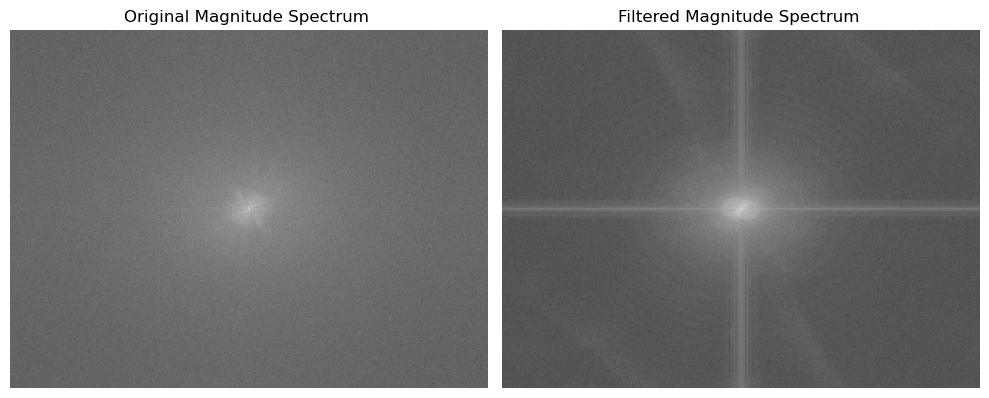

Mean Squared Error (MSE): 1.0721
Pearson Correlation Coefficient: 0.3764



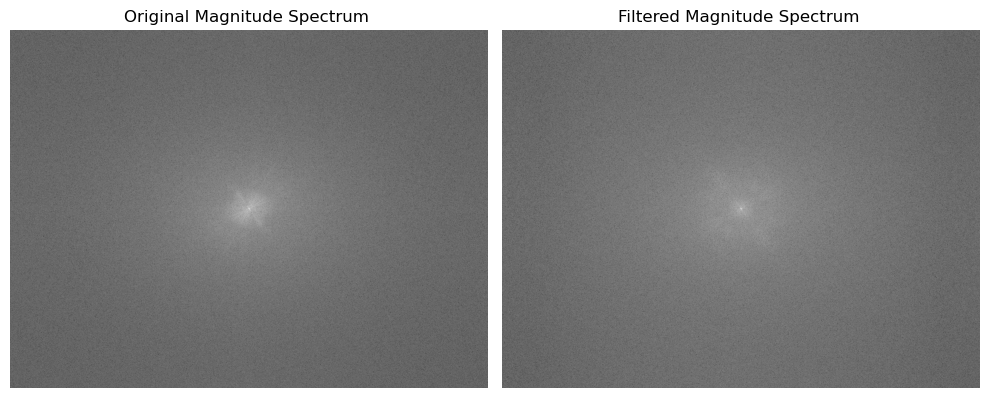

Mean Squared Error (MSE): 0.9954
Pearson Correlation Coefficient: 0.3902



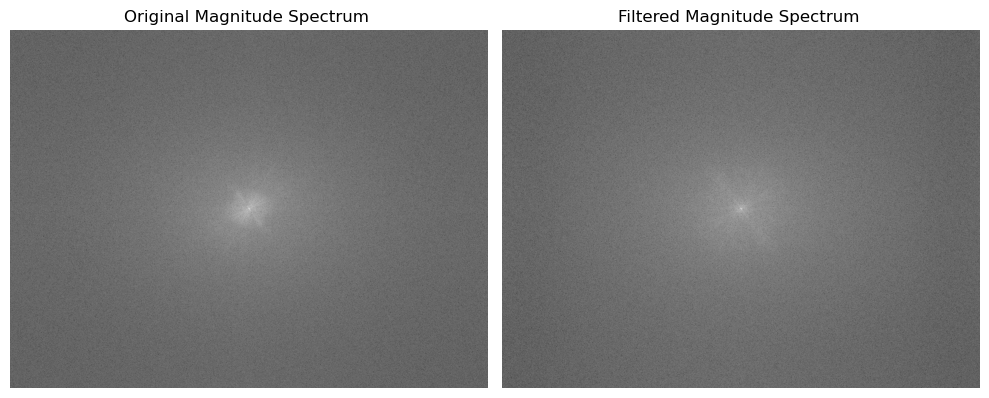

Mean Squared Error (MSE): 0.8879
Pearson Correlation Coefficient: 0.4167



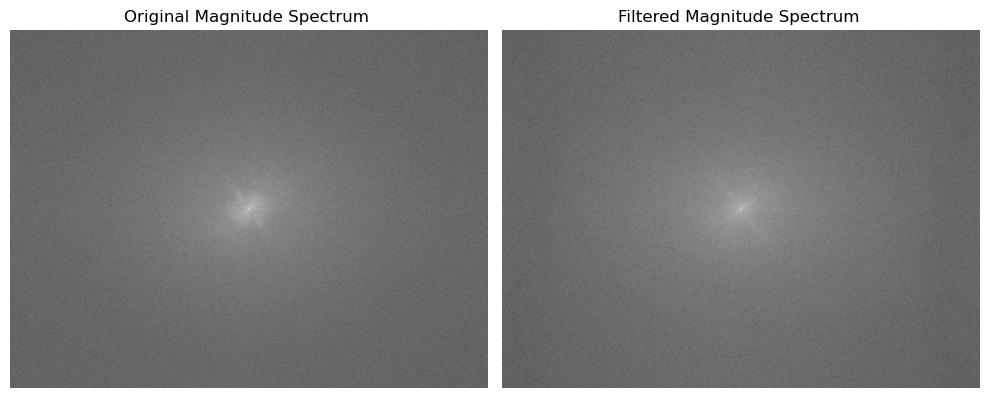

In [6]:
# Cargar la imagen original de Maxi Dress
original_Maxi_Dress = cv2.imread('Img\\Dress_maxi_full.jpg', cv2.IMREAD_GRAYSCALE)

# Cargar imágenes filtradas
filtered_Maxi_Dress = load_images(['Img\\Dress_maxi_15.jpg', 
                                    'Img\\Dress_maxi_10.jpg', 
                                    'Img\\Dress_maxi_grande.jpg', 
                                    'Img\\Dress_maxi_mediano.jpg', 
                                    'Img\\Dress_maxi_pequeno.jpg'])

# Analizar imágenes y graficar resultados
for filtered in filtered_Maxi_Dress:  # Iterar directamente sobre filtered_Maxi_Dress
    mse_value, correlation_value, magnitude_spectrum_original, magnitude_spectrum_filtered = SSIM(original_Maxi_Dress, filtered)
    print(f"Mean Squared Error (MSE): {mse_value:.4f}")
    print(f"Pearson Correlation Coefficient: {correlation_value:.4f}\n")
    plot_spectra(magnitude_spectrum_original, magnitude_spectrum_filtered, '')
